In [1]:
# Testing the azav code in utils.py
from xrayscatteringtools.utils import J4M, azimuthalBinning
from xrayscatteringtools.theory.patterns import SF6__CCSD__aug_cc_pVDZ as CCSD
from xrayscatteringtools.calib.geometry_calibration import model
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
theory = InterpolatedUnivariateSpline(CCSD.q, CCSD.I_q)
proj = model(
    [J4M.x, J4M.y],
    1,
    0,
    0,
    90_000,
    0,
    9.666,
    theory,
    do_angle_of_scattering_correction=False,
)

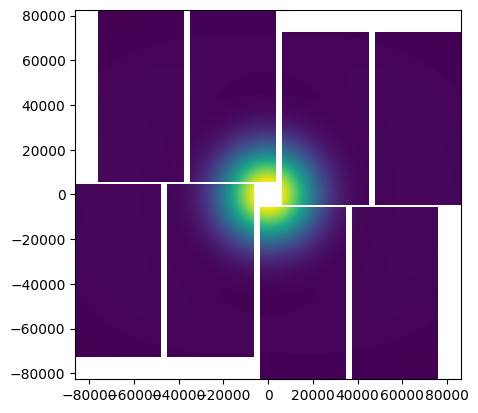

In [7]:
from xrayscatteringtools.plotting import plot_jungfrau
plot_jungfrau(J4M.y,-J4M.x,proj)

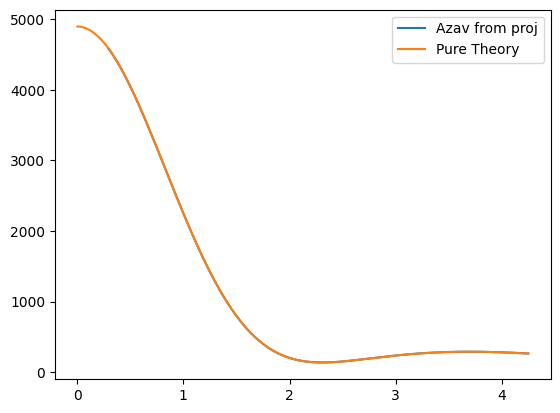

In [25]:
_kwargs = {
    'x': J4M.x,
    'y': J4M.y,
    'x0':  0, # -23.70994492481425
    'y0': 0, # -42.29215571926531
    'z0': 90_000, # 95104.38014082455
    'mask': np.zeros_like(J4M.x).astype(bool),  # & ~ndi.binary_closing((diff <-20) | (diff > 20),structure=np.ones((1, 3, 3), dtype=bool)),
    'keV': 9.666,
    'pPlane':  0,
    'qBin': 0.005,
}
q, azav = azimuthalBinning(proj, **_kwargs)
plt.plot(q,azav, label='Azav from proj')
plt.plot(q,theory(q),label='Pure Theory')
plt.legend()

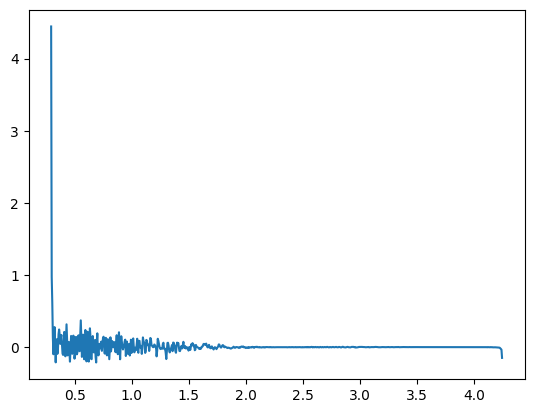

In [26]:
plt.plot(q,(theory(q)-azav))

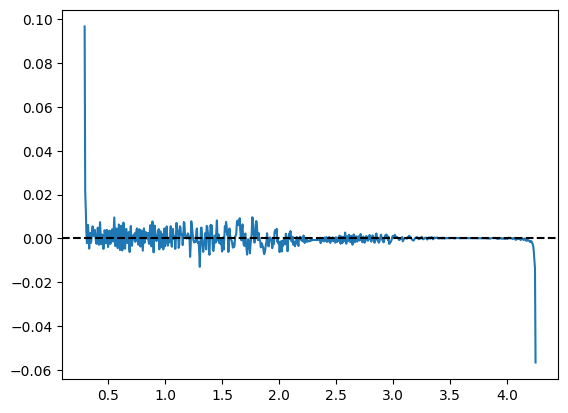

In [27]:
plt.plot(q,100*(theory(q)-azav)/theory(q))
plt.axhline(0, color='k', ls='--')

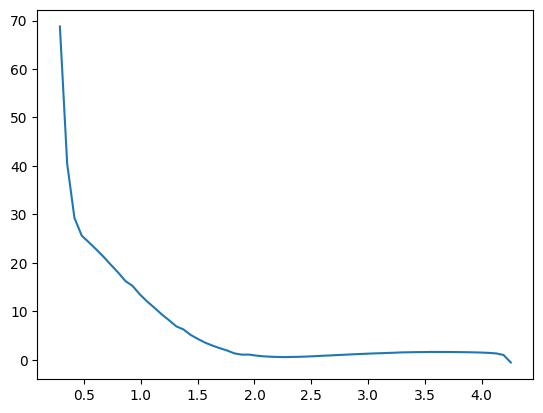

In [5]:
plt.plot(q,(theory(q)-azav))

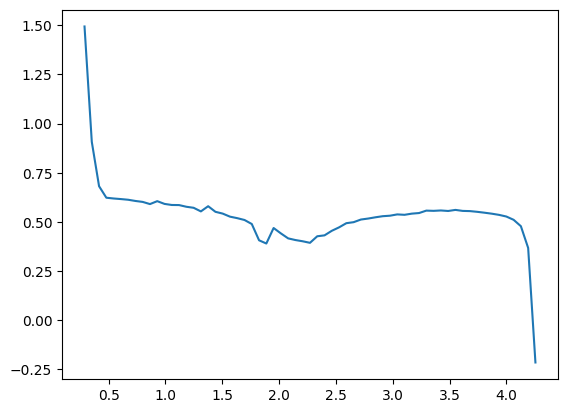

In [6]:
plt.plot(q,100*(theory(q)-azav)/theory(q))